<a href="https://colab.research.google.com/github/rutujas11/Machine-Learning-Models/blob/main/Outlier_detection_PyOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# KNN for Anomaly detection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.neighbors import NearestNeighbors
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Demo Datasets/Iris.csv')
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df = df1[['SepalLengthCm','SepalWidthCm']]
df.head()

,SepalLengthCm,SepalWidthCm
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


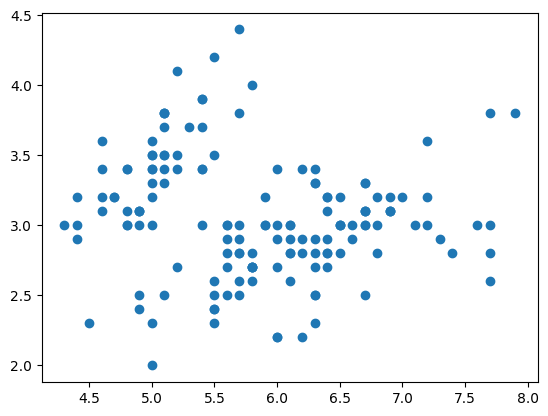

In [ ]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])

In [ ]:
X = df.values
nbrs = NearestNeighbors(n_neighbors = 3)
nbrs.fit(X)

NearestNeighbors(n_neighbors=3)

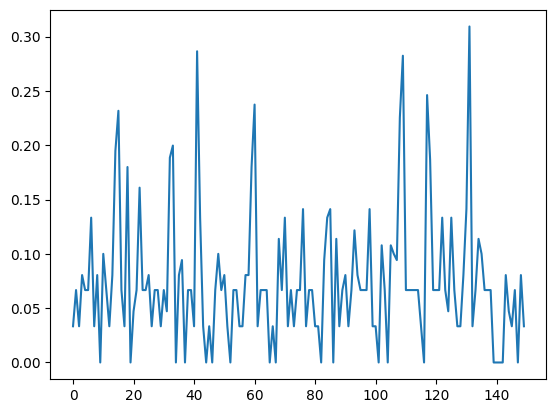

In [ ]:
distances, indexes = nbrs.kneighbors(X)
plt.plot(distances.mean(axis = 1))

In [ ]:
outlier_index = np.where(distances.mean(axis = 1) > 0.15)
outlier_index

(array([ 14,  15,  18,  22,  32,  33,  41,  59,  60, 108, 109, 117, 118,
        131]),)

In [ ]:
outlier_values = df.iloc[outlier_index]
outlier_values

,SepalLengthCm,SepalWidthCm
14,5.8,4.0
15,5.7,4.4
18,5.7,3.8
22,4.6,3.6
32,5.2,4.1
33,5.5,4.2
41,4.5,2.3
59,5.2,2.7
60,5.0,2.0
108,6.7,2.5


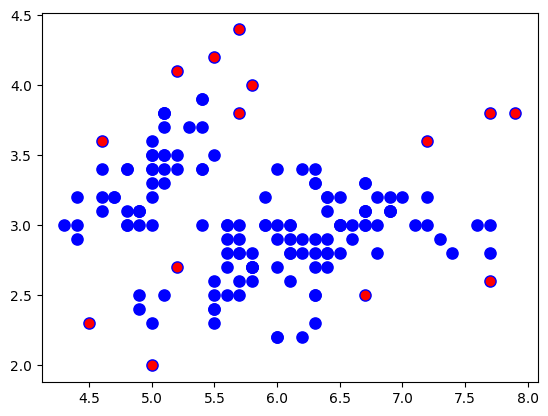

In [ ]:
plt.scatter(df['SepalLengthCm'], df['SepalWidthCm'],color='b', s=65)
plt.scatter(outlier_values['SepalLengthCm'], outlier_values['SepalWidthCm'],color = 'red')